# EikonalNet: 2D example

We first import the packages. Note when we import models_tf, we will import tensorflow. This code is written in tensorflow 2.0

In [ ]:
pip install pydoe

In [ ]:
pip install tensorflow-probability

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pyDOE import lhs
from models_tf import Eikonal2DnetCV2

We define a benchmark problem, which exactly satisfies the Eikonal equation and has a discontinuity in conduction velocity

In [ ]:
def exact(X, Y):
    return np.minimum(np.sqrt(X**2 + Y**2), 0.7*np.sqrt((X - 1)**2 + (Y - 1)**2))

def CVexact(X, Y):
    mask = np.less_equal(np.sqrt(X**2 + Y**2), 0.7*np.sqrt((X - 1)**2 + (Y - 1)**2))
    return mask*1.0 + ~mask*1.0/0.7

Now we generate a grid to show the exact solution and also some training points and plot them

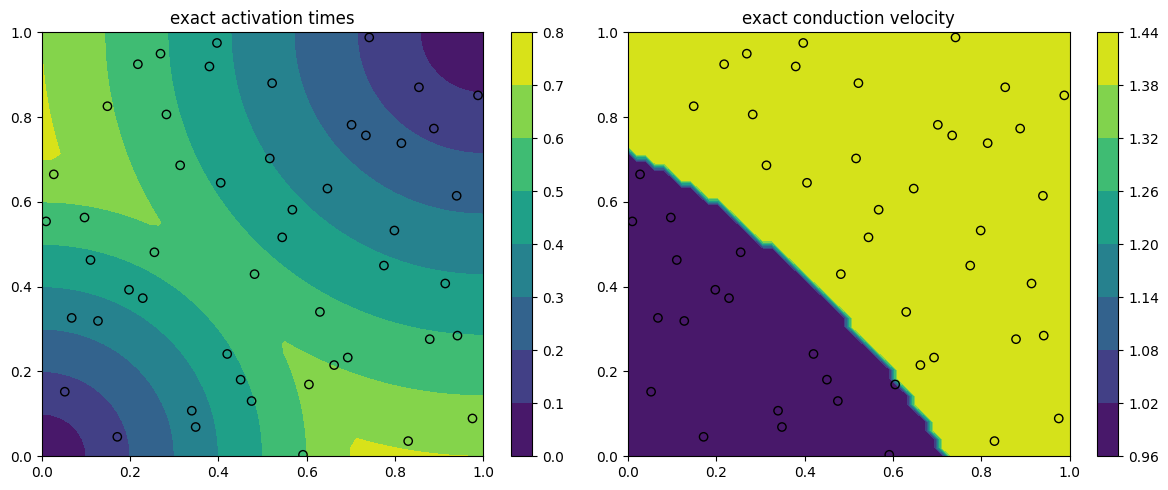

In [ ]:
N_grid = 50
x = y = np.linspace(0,1,N_grid)[:,None]

N_train = 50

X_m, Y_m = np.meshgrid(x,y)
X = X_m.flatten()[:,None]
Y = Y_m.flatten()[:,None]
T = exact(X,Y)
CV = CVexact(X,Y)

X_train_all = lhs(2, N_train)
X_train = X_train_all[:,:1]
Y_train = X_train_all[:,1:]
T_train = exact(X_train, Y_train)

fig = plt.figure()
fig.set_size_inches((12,5))
plt.subplot(121)
plt.contourf(X_m, Y_m, T.reshape(X_m.shape))
plt.colorbar()
plt.scatter(X_train, Y_train, facecolors = 'none', edgecolor = 'k')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('exact activation times')

plt.subplot(122)
plt.contourf(X_m, Y_m, CV.reshape(X_m.shape))
plt.colorbar()
plt.scatter(X_train, Y_train, facecolors = 'none', edgecolor = 'k')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('exact conduction velocity')

plt.tight_layout()

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device

We define the architecture of the network, the collocation points for training and some parameters:

Then, we train the model first with ADAM and then we finalize with BFGS

In [ ]:
layers = [2,20,20,20,20,20,1]
CVlayers = [2,5,5,5,5,1]

# collocation points
X_pde = X
Y_pde = Y

# maximum value for the conduction velocity
CVmax = 1.5

model = Eikonal2DnetCV2(X_pde, Y_pde, X_train, Y_train, T_train,
                        layers, CVlayers, C = CVmax, alpha = 1e-7, alphaL2 = 1e-9)
model.train_Adam_minibatch(50000, size = 100)
model.train()  # BFGS training

Streaming output truncated to the last 5000 lines.
Loss: 2.29212e-04
Loss: 2.29771e-04
Loss: 2.31105e-04
Loss: 2.33637e-04
Loss: 2.37791e-04
Loss: 2.43754e-04
Loss: 2.51496e-04
Loss: 2.60720e-04
Loss: 2.70563e-04
Loss: 2.79062e-04
Loss: 2.83269e-04
Loss: 2.80350e-04
Loss: 2.69676e-04
Loss: 2.54033e-04
Loss: 2.38390e-04
Loss: 2.26785e-04
Loss: 2.20439e-04
Loss: 2.18446e-04
Loss: 2.19469e-04
Loss: 2.22735e-04
Loss: 2.27851e-04
Loss: 2.34341e-04
Loss: 2.41504e-04
Loss: 2.48704e-04
Loss: 2.55435e-04
Loss: 2.61072e-04
Loss: 2.64755e-04
Loss: 2.65898e-04
Loss: 2.64725e-04
Loss: 2.62031e-04
Loss: 2.58165e-04
Loss: 2.52487e-04
Loss: 2.44456e-04
Loss: 2.35258e-04
Loss: 2.27799e-04
Loss: 2.24647e-04
Loss: 2.26229e-04
Loss: 2.30794e-04
Loss: 2.35764e-04
Loss: 2.39303e-04
Loss: 2.41141e-04
Loss: 2.42152e-04
Loss: 2.43515e-04
Loss: 2.45962e-04
Loss: 2.49601e-04
Loss: 2.54038e-04
Loss: 2.58446e-04
Loss: 2.61358e-04
Loss: 2.61087e-04
Loss: 2.56763e-04
Loss: 2.49290e-04
Loss: 2.40993e-04
Loss: 2.34109

Finally, we can predict and compare to the exact results.

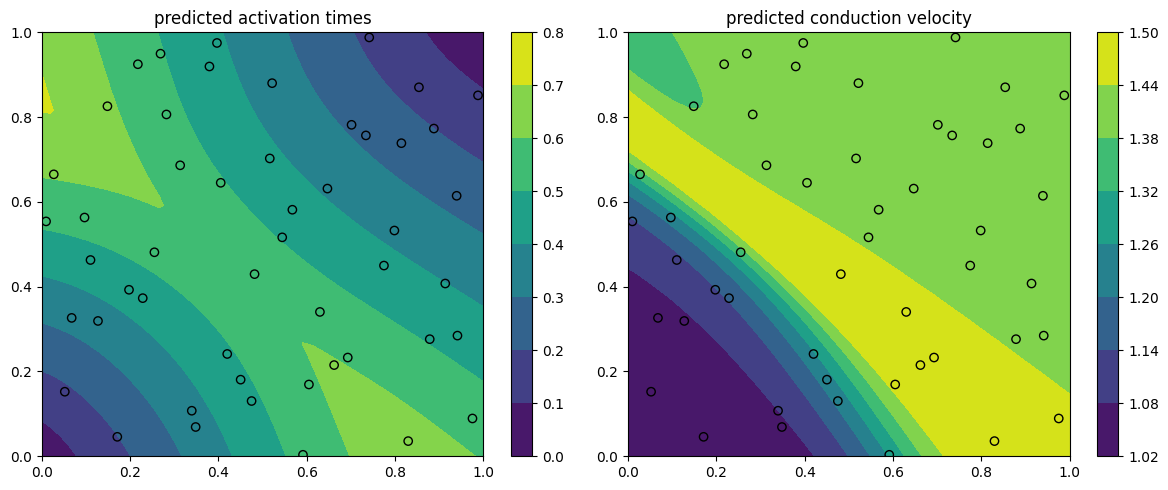

In [ ]:
T_star, CV_star = model.predict(X,Y)

fig = plt.figure()
fig.set_size_inches((12,5))
plt.subplot(121)
plt.contourf(X_m, Y_m, T_star.reshape(X_m.shape))
plt.colorbar()
plt.scatter(X_train, Y_train, facecolors = 'none', edgecolor = 'k')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('predicted activation times')

plt.subplot(122)
plt.contourf(X_m, Y_m, CV_star.reshape(X_m.shape))
plt.colorbar()
plt.scatter(X_train, Y_train, facecolors = 'none', edgecolor = 'k')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('predicted conduction velocity')

plt.tight_layout()